In [69]:
import seaborn as sns
from src.mcmc import metropolis_guided_walk, metropolis_within_gibbs_guided_walk, simulated_tempering_guided_walk, tempered_transitions_guided_walk, shortcut_tempered_transitions_guided_walk

<Axes: ylabel='Density'>

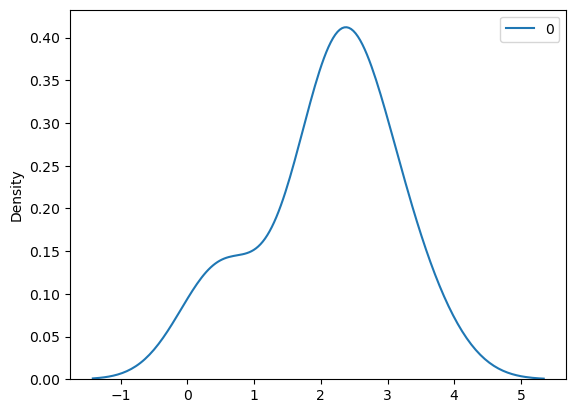

In [ ]:
pi = [0.5, 0.05404275]
temp = [1, 1.1, 1.2, 1.3, 1.4]
c_up = 0.1
c_down = 0.3
x  = shortcut_tempered_transitions_guided_walk(10, temp, pi, c_up, c_down)
sns.kdeplot(x)

<Axes: ylabel='Density'>

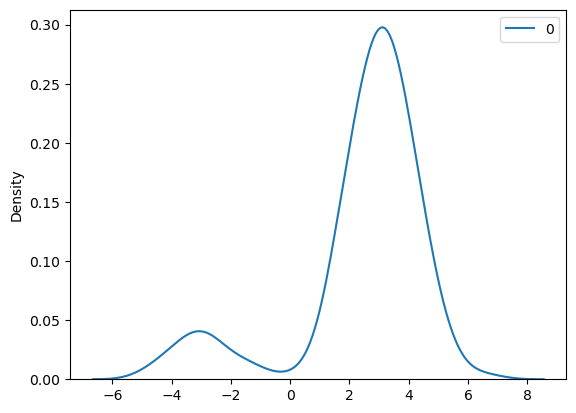

In [70]:
x = metropolis_guided_walk(1000)
sns.kdeplot(x)

<Axes: ylabel='Density'>

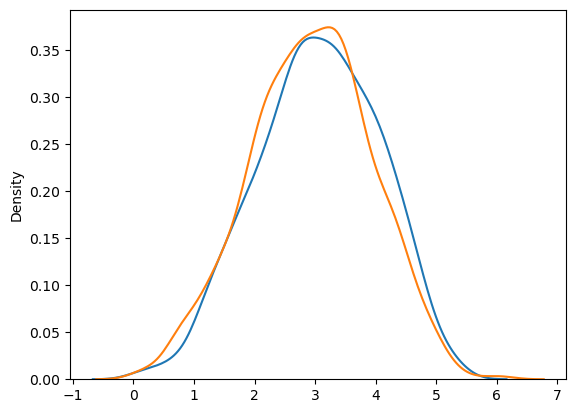

In [57]:
x = metropolis_within_gibbs_guided_walk(1000)
sns.kdeplot(x[:, 0])
sns.kdeplot(x[:, 1])

<Axes: ylabel='Density'>

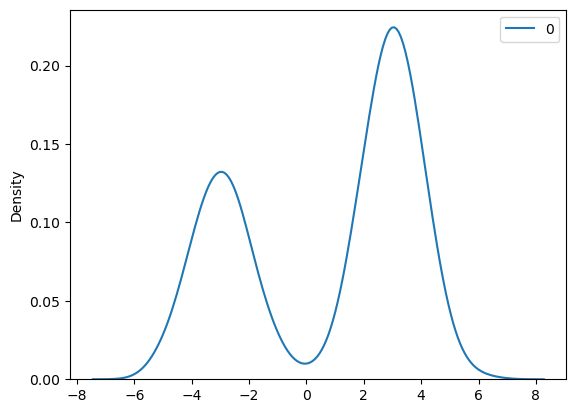

In [71]:
temp = [1, 1.1, 1.2, 1.3, 1.4]
x = tempered_transitions_guided_walk(10000, temp)
sns.kdeplot(x)

<Axes: ylabel='Density'>

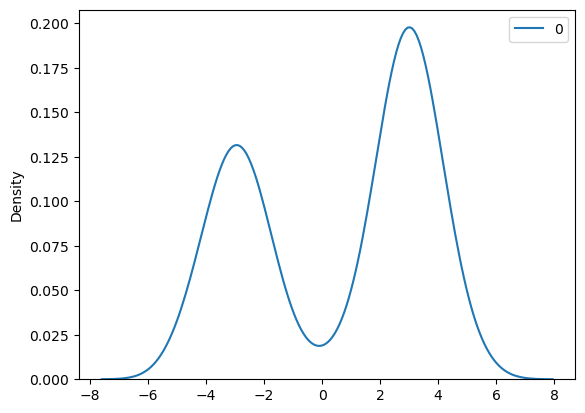

In [67]:
temp = [1, 1.1, 1.2, 1.3, 1.4]
pi = [0.5, 0.22331096 , 0.12549773 , 0.07929218 , 0.05404275]
x = simulated_tempering_guided_walk(1000, temp, pi)
sns.kdeplot(x)